count=372
37.2%


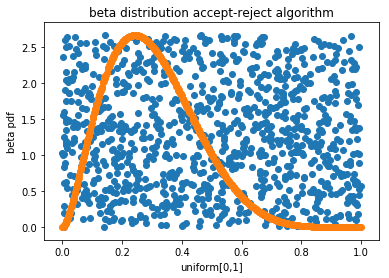

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

m = 2.67
alpha = 2.7
beta = 6.3
total_num = 1000
count = 0
Y = np.random.random(total_num)
U = m * np.random.random(total_num)
beta_pdf = stats.beta(alpha, beta).pdf(Y)

# # counting valid points
for i in range(total_num):
    if U[i]<=beta_pdf[i]:
        count+=1
print('count='+str(count))
print(str(100.0 * count/total_num)+'%')
plt.scatter(Y, U)

plt.scatter(Y, beta_pdf)
plt.xlabel('uniform[0,1]')
plt.ylabel('beta pdf')
plt.title('beta distribution accept-reject algorithm')
plt.show()

valid_num = 5000
100.0%


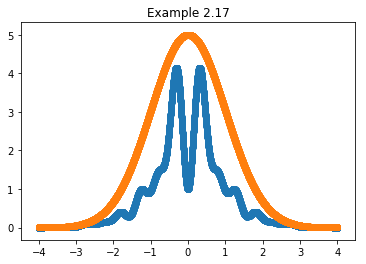

In [7]:
from scipy import integrate
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
lb = -4
hb = 4
total_num = 5000
valid_num = 0

def f(x):
    return np.exp(-x*x/2)*(np.sin(6*x)*np.sin(6*x)+3*np.cos(x)*np.cos(x)*np.sin(4*x)*np.sin(4*x)+1)

def f_pdf(x):
    res,_ = integrate.quad(f, lb, hb)
    return f(x)
    # return f(x)/res

rs,_ = integrate.quad(f_pdf, lb, hb)
# print(rs)

X = np.linspace(lb, hb, total_num)
Y = f(X)
M = np.max(Y)
# print(M)
norm_pdf = stats.norm(0,1).pdf(X)
norm_pdf = 5 * np.sqrt(2*np.pi) * norm_pdf

for i in range(total_num):
    if norm_pdf[i]>=Y[i]:
        valid_num+=1
print('valid_num = '+str(valid_num))
print(str(100.0*valid_num/total_num)+'%')
plt.scatter(X,Y)
plt.scatter(X, norm_pdf)
plt.title('Example 2.17')
plt.show()

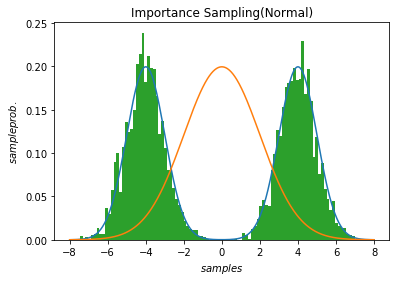

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def normal(mu,sigma,x): #normal distribution
    return 1/(math.pi*2)**0.5/sigma*np.exp(-(x-mu)**2/2/sigma**2)

def eval(x):
    return normal(-4,1,x) + normal(4,1,x)

def ref(x):
    return normal(0,2,x)  #normal
    #return np.array([0.2 for i in range(len(x))])  #uniform

N=100000
M=5000
#x = (np.random.rand(N)-0.5)*16
x = np.random.normal(0,2,N)
w_x = eval(x)/ref(x)
w_x = w_x/sum(w_x)
w_xc = np.cumsum(w_x) #accumulate

X=np.array([])
for i in range(M):
    u = np.random.rand()
    X = np.hstack((X,x[w_xc>u][0]))

x = np.linspace(-8,8,500)
plt.plot(x,eval(x)/2)
plt.plot(x,ref(x))
plt.hist(X,bins=100,density=True)
#plt.title('Importance Sampling(Uniform)')
plt.title('Importance Sampling(Normal)')
plt.xlabel('$samples$')
plt.ylabel('$sample prob.$')
#plt.savefig('ImpSampling1.png',dpi=70)
plt.savefig('ImpSampling2.png',dpi=70)
plt.show()

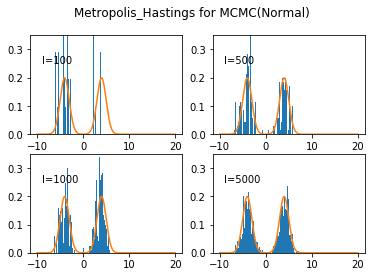

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def normal(mu,sigma,x): #normal distribution
    return 1/(math.pi*2)**0.5/sigma*np.exp(-(x-mu)**2/2/sigma**2)

def eval(x):
    return normal(-4,1,x) + normal(4,1,x)
    #return 0.3*np.exp(-0.2*x**2)+0.7*np.exp(-0.2*(x-10)**2)

def ref(x_star,x):  #normal distribution
    return normal(x,10,x_star)

N = [100,500,1000,5000]
fig = plt.figure()
for i in range(4):
    X = np.array([])
    x = 0.1 #initialize x0 to be 0.1
    for j in range(N[i]):
        u = np.random.rand()
        x_star = np.random.normal(x,10)
        A = min(1,eval(x_star)/eval(x)) #*q(x,x_star)/p(x)/q(x_star,x))
        if u < A:
            x = x_star
        X=np.hstack((X,x))

    ax = fig.add_subplot(2,2,i+1)
    ax.hist(X,bins=100,density=True)
    x = np.linspace(-10,20,5000)
    #ax.plot(x,eval(x)/2.7) #2.7 approximates the normalizing constant
    ax.plot(x,eval(x)/2) #2 approximates the normalizing constant
    ax.set_ylim(0,0.35)
    ax.text(-9,0.25,'I=%d'%N[i])

fig.suptitle('Metropolis_Hastings for MCMC(Normal)')
#fig.suptitle('Metropolis_Hastings for MCMC(Exp.)')
plt.savefig('MetropolisNormal.png',dpi=100)
#plt.savefig('MetropolisExp.png',dpi=100)
plt.show()

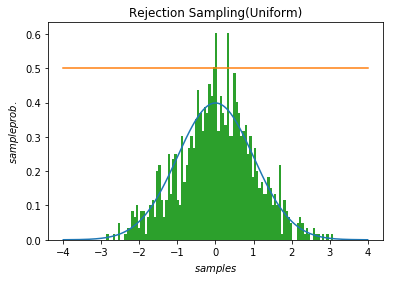

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

def normal(mu,sigma,x): #normal distribution
    return 1/(math.pi*2)**0.5/sigma*np.exp(-(x-mu)**2/2/sigma**2)

def eval(x):
    return normal(0,1,x)

def ref(x):
    return np.array([1/8 * 4 for i in range(len(x))])  #uniform
    #return normal(1,2,x) * 2.5 #normal 

N=1000 #number of samples needed
i = 1
X = np.array([])
while i < N:
    u = np.random.rand(10) #evaluate 10 each loop
    x = (np.random.rand(10)-0.5)*8
    #x = np.random.normal(1,2,10)
    res = u < eval(x)/ref(x)
    if any(res):
        X = np.hstack((X,x[res]))
        i+=len(x[res])
X=X[:1000]

x = np.linspace(-4,4,500)
plt.plot(x,eval(x))
plt.plot(x,ref(x))
plt.hist(X,bins=100,density=True)
plt.title('Rejection Sampling(Uniform)')
#plt.title('Rejection Sampling(Normal)')
plt.xlabel('$samples$')
plt.ylabel('$sample prob.$')
plt.savefig('RejSamplingUniform.png',dpi=70)
#plt.savefig('RejSamplingNormal.png',dpi=70)
plt.show()

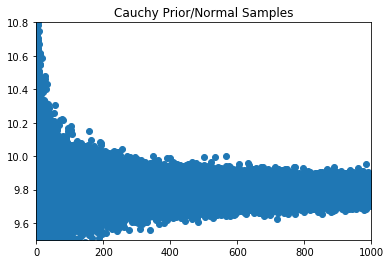

In [12]:
import numpy as np
import matplotlib.pyplot as plt

m = 1000
runs = 100

def delta(k):
    theta = [np.random.normal(10, 1) for _ in range(k)]
    numerator=0
    denominator = 0
    for i in range(k):
        numerator+=theta[i]/(1+theta[i]**2)
        denominator+=1/(1+theta[i]**2)
    return numerator/denominator

x_list = []
y_list = []
for i in range(m):
    for run in range(runs):
        x_list.append(i+1)
        y_list.append(delta(i+1))

plt.xlim(0,1000)
plt.ylim(9.5,10.8)
plt.scatter(x_list,y_list)
plt.title('Cauchy Prior/Normal Samples')
plt.show()

0.37503966104453373 3.7384925641896336
3.8325057631835238


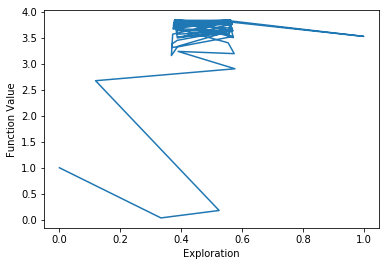

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

def T(t):
    try:
        return 1/log(t)
    except Exception:
        return 1

def h(x):
    result = (cos(50*x)+sin(20*x))**2
    return result

def max(a,b):
    if a>=b:
        return a
    else:
        return b

def min(a,b):
    if a<=b:
        return a
    else:
        return b

def rho(u, x, t):
    result = min(exp((h(u)-h(x)) / T(t)), 1)
    return result

r = 0.5
iterations = 2500
X=[0]
T_list=[0]
H = [h(X[0])]
for t in range(iterations):
    at = max(X[t]-r, 0)
    bt = min(X[t]+r, 1)
    u = np.random.uniform(at,bt)
    # rand_choice = np.random.uniform(0,1)
    rand_choice = np.random.random()
    # print('randome_choice:',rand_choice)
    # print('u',u)
    if rand_choice<=rho(u,X[-1],t):
        X.append(u)
    else:
        X.append(X[t])

    T_list.append(T(t))
    H.append(h(X[-1]))

print(X[-1],H[-1])
print(sorted(H,reverse=True)[0])
plt.xlabel('Exploration')
plt.ylabel('Function Value')
plt.plot(X,H)
plt.show()

In [6]:
import numpy as np
from math import *

n = 10**5
X = np.random.uniform(0,1,n)
Y = np.random.uniform(0,1,n)

def f(x):
    result = (1/sqrt(2*pi))*(exp(-(x**2)/2))
    return result

count =0
for i in range(n):
    if Y[i]<=f(X[i]):
        count+=1

print(count/n)

0.34298


In [10]:
import numpy as np
from math import *

def g(x):
    result = exp((-x**2)/2)/sqrt(2*pi)
    return result

def f(y):
    result = (g((b-a)*y+a)-c)/(d-c)
    return result

n = 10**5
X = np.random.uniform(0,1,n)
Y = np.random.uniform(0,1,n)
a = 2
b = 5
c = g(5)
d = g(2)
count = 0
J0 = (a-b)*(c-d)
J1 = c*(b-a)

for i in range(n):
    if Y[i]<=f(X[i]):
        count+=1

print(count)
integral = J0*count/n + J1
print(integral)

14085
0.022817714845360867
